# Prueba Intertrimestral

Nombre y Apellidos: Fernando Perez Alba

Tiempo de la prueba: 1h y 45 mins

Asignatura: Desarrollo de Aplicaciones para la Visualización de Datos

Fecha: 14 de octubre de 2024

Instrucciones:

- Herramientas Sugeridas: Python (pandas, matplotlib, seaborn, scikit-learn).

- Evaluación: Se valorará la capacidad para interpretar los resultados y la claridad en la exposición de las conclusiones.

- Materiales permitidos: Materiales de clase. Internet para búsqueda de dudas y documentación.

- Prohibido: Mingún tipo de LLM, ni mensajería instantánea.

- Formato de Entrega: Los estudiantes deben presentar su trabajo en formato de notebook (por ejemplo, Jupyter Notebook), con gráficos y explicaciones detalladas.

- Entrega: Subir .ipynb y PDF a Github. Enviar resultados al siguiente enlace. Para crear PDF: File -> Print -> Destination as PDF

## [Entrega aquí el examen](https://forms.gle/gU7aKkzE7didZpYV7)




Carga aquí las librerías que creas que vayas a utilizar:

In [51]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.figure_factory as ff
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from plotly.subplots import make_subplots
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import (accuracy_score, confusion_matrix)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ejercicio 1: Programación (2 puntos)

a) Crea una función que calcule y devuelva el valor de la iteración $n+1$ del mapa logístico dada la fórmula:

$x_{n+1}=r⋅x_n⋅(1−x_n)$

donde:

- $r$ es la tasa de crecimiento
- $x_n$ es el valor de la iteración anterior.

La función debe aceptar como parámetros $r$ y $x_n$ (valor inicial). (0.6 puntos)


In [52]:
def logistic_map(r, x_n):
    # Calcula la siguiente iteracion del mapa logistico
    x_next = r * x_n * (1 - x_n)
    return x_next


b) Crea una función que genere una lista con las primeras n iteraciones del mapa logístico, utilizando la función anterior. (0.6 puntos)

In [53]:
def logistic_sequence(r, x_0, n):
    # Genera una lista con las primeras n iteraciones del mapa logistico
    x = [x_0]
    for i in range(n):
        x.append(logistic_map(r, x[-1]))
    return x


c) Guarda en un dataframe las iteraciones del mapa logístico, para $r = \{0, 0.25, 0.5, 0.75, \dots, 4\}$ y semilla $x_0 = 0.2$. El dataframe debe tener tres columnas: $r$, $n$ y $x_{n+1}$. Muestra los 10 primeros resultados (0.6 puntos)

NOS HAN PEDIDO QUITAR EL 0

In [129]:
def logistic_dataframe(r_values, x_0, n):
    # Guarda en un dataframe las iteraciones del mapa logistico
    data = []
    for r in r_values:
        x = logistic_sequence(r, x_0, n)
        for i in range(n):
            data.append([r, i, x[i]])
    df = pd.DataFrame(data, columns=['r', 'n', 'x_{n+1}'])
    print(df.head(10))
    return df

logistic_dataframe(np.arange(0.25, 4.25, 0.25), 0.2, 10)

      r  n       x_{n+1}
0  0.25  0  2.000000e-01
1  0.25  1  4.000000e-02
2  0.25  2  9.600000e-03
3  0.25  3  2.376960e-03
4  0.25  4  5.928275e-04
5  0.25  5  1.481190e-04
6  0.25  6  3.702427e-05
7  0.25  7  9.255725e-06
8  0.25  8  2.313910e-06
9  0.25  9  5.784761e-07


,r,n,x_{n+1}
0,0.25,0,0.200000
1,0.25,1,0.040000
2,0.25,2,0.009600
3,0.25,3,0.002377
4,0.25,4,0.000593
...,...,...,...
155,4.00,5,0.585421
156,4.00,6,0.970813
157,4.00,7,0.113339
158,4.00,8,0.401974


d) ¿Cómo se podría programar en una clase las dos funciones anteriores para calcular y almacenar iteraciones del mapa logístico? Proporciona la implementación de la clase con un método para obtener el valor de una iteración específica, otro método para generar la lista completa de iteraciones y otro para crear un gráfico que visualice el $r$ y $x_{n+1}$. (0.2 puntos)

In [130]:
class LogisticMap:
    """Esta clase permite calcular y almacenar iteraciones del mapa logistico
    """
    def __init__(self, r, x_0):
        """Este metodo permite inicializar la clase LogisticMap

        Args:
            r (_type_): _description_
            x_0 (_type_): _description_
        """
        self.r = r
        self.x_0 = x_0
        self.x = [x_0]

    def logistic_map(self, x_n):
        x_next = self.r * x_n * (1 - x_n)
        return x_next

    def logistic_sequence(self, n):
        for i in range(n):
            self.x.append(self.logistic_map(self.x[-1]))
        return self.x

    def logistic_plot(self, n):
        x = self.logistic_sequence(n)
        fig = go.Figure(data=go.Scatter(x=np.arange(n+1), y=x, mode='markers+lines'))
        fig.update_layout(title=f'Mapa logístico r={self.r}, x_0={self.x_0}', xaxis_title='n', yaxis_title='x_n')
        fig.show()

# Ejercicio 2: Exploración y comprensión (3 puntos)

a) Describe las principales variables del dataset proporcionado. ¿Qué información aportan y qué tipo de datos contiene cada una? ¿Existen valores faltantes en el dataset? Si es así, ¿en qué variables? ¿Qué propones para resolverlo? (1 puntos)


In [56]:

dataset = pd.read_csv('Walmart.csv')
print(dataset.head())
print(dataset.info())
# Los datos proporcionados contienen información sobre las ventas de una tienda de Walmart. 
# El dataset contiene 282 registros y 5 columnas. Las columnas son:
#'Store': el número de la tienda, su tipo de datos es int64
#'Date': la fecha de las ventas, su tipo de datos es object (vemos que es un formato fecha)
#'Weekly_Sales': las ventas semanales, su tipo de dato es float64
#'Holiday_Flag': indica si la semana continene un día festivo, su tipo de dato int64
#'Temperature': la temperatura en la semana, su tipo de dato es float64
#'Fuel_Price': el precio del combustible en la semana, su tipo de dato es float64
#'CPI': el índice de precios al consumidor en la semana, su tipo de dato es float64
#'Unemployment': la tasa de desempleo en la semana, su tipo de dato es float64

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   i

In [57]:
print(dataset.isnull().sum())
print(dataset.isna().sum())
#Hay un dato faltante en la variable Unemployment. 
#Para resolverlo, se puede reemplazar el valor faltante por la media de la variable.

#Podriamos hacerlo con la siguiente linea de codigo, pero no se nos lo pide 
#(Lo acabamos haciendo mas adelante)
#dataset['Unemployment'].fillna(dataset['Unemployment'].mean(), inplace=True)



Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    1
dtype: int64


b) Realiza un gráfico de barras que responda las siguientes preguntas. ¿Cuántas tiendas $Store$ están presentes en el dataset? ¿Cuál es la media de ventas semanales $Weekly Sales$ por tienda? ¿Qué tiendas tienen las ventas promedio más altas y más bajas? (1 puntos)



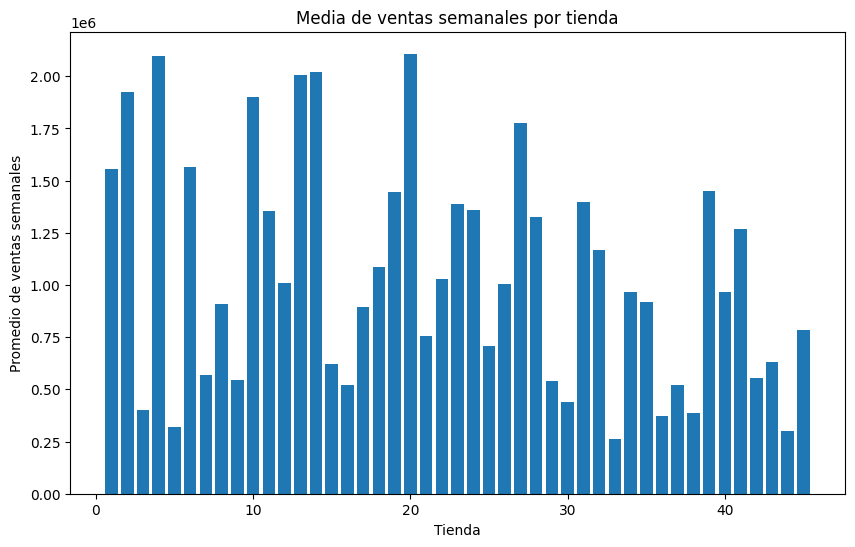

20
33


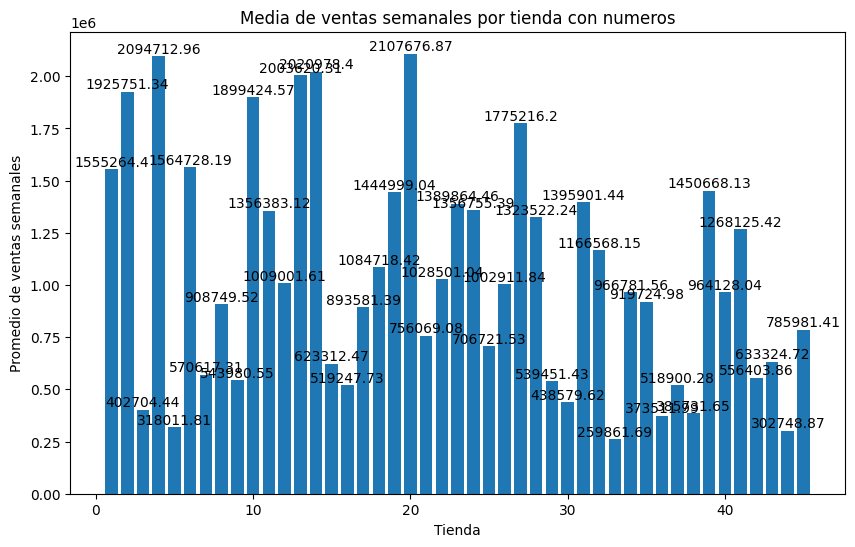

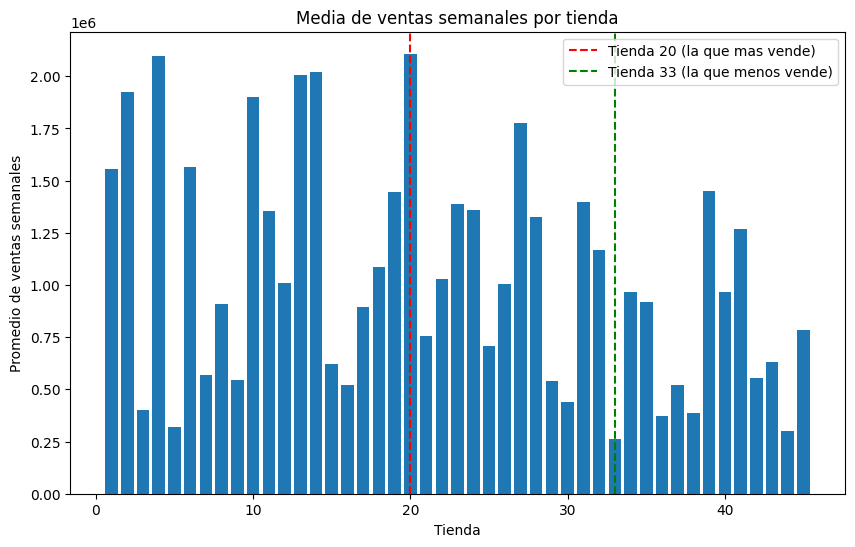

In [131]:
plt.figure(figsize=(10, 6))
plt.bar(dataset['Store'].unique(), dataset.groupby('Store')['Weekly_Sales'].mean())
plt.xlabel('Tienda')
plt.ylabel('Promedio de ventas semanales')

plt.title('Media de ventas semanales por tienda')
plt.show()

#En el grafico se puede ver en el eje x que hay 45 tiendas en total
#En el eje y se puede ver el promedio de ventas semanales por tienda
#La tienda con el promedio de ventas semanales mas alto es la tienda 20
#La tienda con el promedio de ventas semanales mas bajo es la tienda 33
#Lo podemos compronar con el siguiente codigo
print(dataset.groupby('Store')['Weekly_Sales'].mean().idxmax()) 
print(dataset.groupby('Store')['Weekly_Sales'].mean().idxmin())

#Como se puede dudar viendo el primer grafico que sean las mas altas y bajas (algunas semanas estan cerca)
#Podemos apañarlo mostrando los numeros de las ventas en las barras en otro grafico
#Para hacer que salga el numero encima de las barras

plt.figure(figsize=(10, 6))
plt.bar(dataset['Store'].unique(), dataset.groupby('Store')['Weekly_Sales'].mean())
for i, mean in enumerate(dataset.groupby('Store')['Weekly_Sales'].mean()):
    plt.text(i+1, mean, round(mean, 2), ha='center', va='bottom')
plt.xlabel('Tienda')
plt.ylabel('Promedio de ventas semanales')

plt.title('Media de ventas semanales por tienda con numeros')
plt.show()

#Confirmamos que la tienda 20 y 33 son la que tiene mas y menos ventas respectivamente
#Vamos a repetir el primer grafico y señarlar la tienda 20 y 33
plt.figure(figsize=(10, 6))
plt.bar(dataset['Store'].unique(), dataset.groupby('Store')['Weekly_Sales'].mean())
plt.xlabel('Tienda')
plt.ylabel('Promedio de ventas semanales')
#Señalar la tienda 20 y 33
plt.axvline(x=20, color='r', linestyle='--', label='Tienda 20 (la que mas vende)')
plt.axvline(x=33, color='g', linestyle='--', label='Tienda 33 (la que menos vende)')
plt.legend()
plt.title('Media de ventas semanales por tienda')
plt.show()













c) Genera un gráfico de líneas que muestre la evolución de las ventas semanales $Weekly Sales$ a lo largo del tiempo para la tienda con más ventas totales. ¿Observas algún patrón estacional o tendencia? (1 puntos)

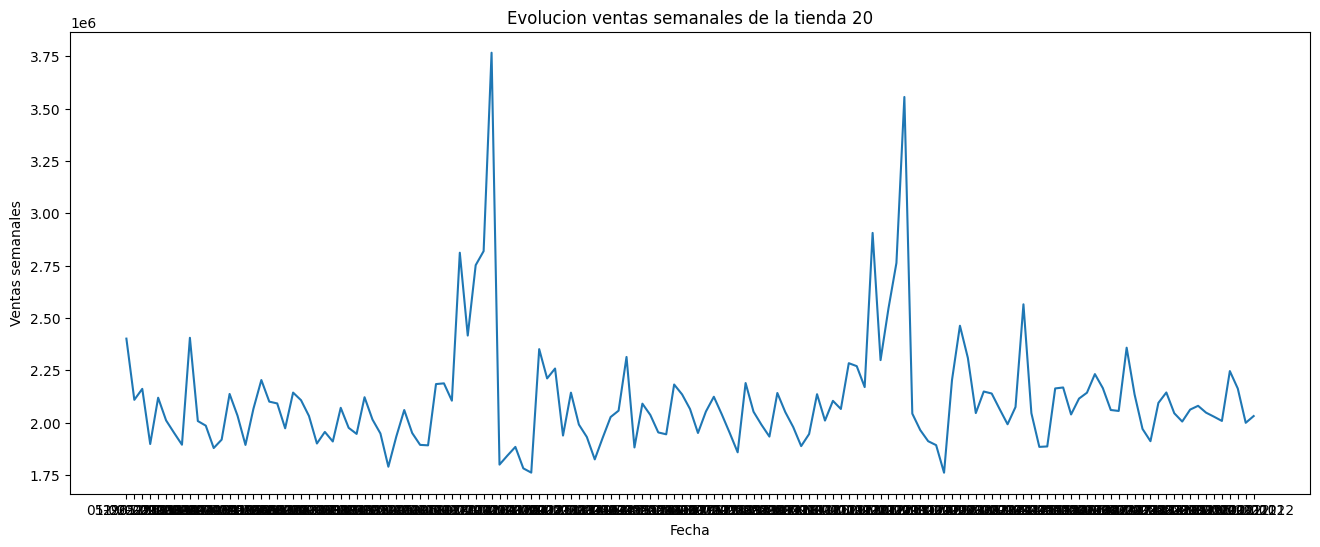

2763    24-12-2010
2815    23-12-2011
Name: Date, dtype: object


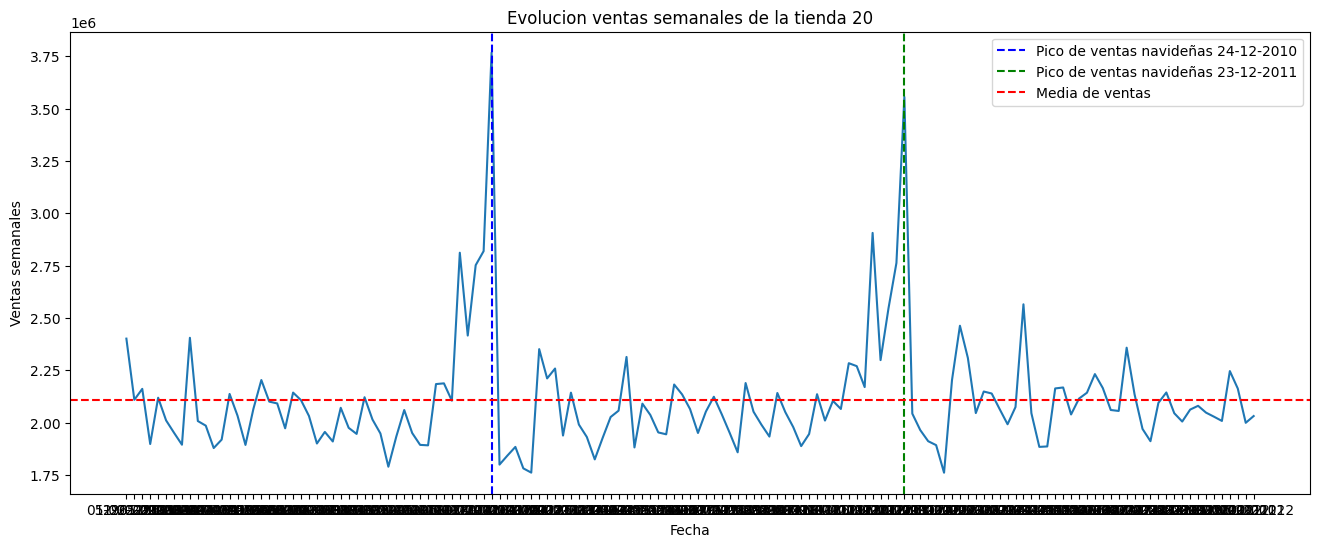

In [133]:
plt.figure(figsize=(16, 6))
store_20 = dataset[dataset['Store'] == 20] #hemos dicho que la 20 es la que mas vende
plt.plot(store_20['Date'], store_20['Weekly_Sales'])
plt.xlabel('Fecha')
plt.ylabel('Ventas semanales')
plt.title('Evolucion ventas semanales de la tienda 20')
plt.show()


#Observamos un patrón estacional en las ventas semanales de la tienda 20.
#Hay dos picos de ventas en las epocas navideñas, uno en 2010 y otro en 2011.
#El resto del año se mantienen las ventas bajas, con pequeñas variaciones.
#En general, se observa una tendencia ligeramente decreciente en los picos las ventas a lo largo del tiempo.

#Calculo las dos semanas con más ventas para ponerlas en el grafico
print(store_20.nlargest(2, 'Weekly_Sales')['Date'])
#24-12-2010
#23-12-2011

#Tambien vamos a incluir la media en el grafico para aportar mas informacion
plt.figure(figsize=(16, 6))
store_20 = dataset[dataset['Store'] == 20]
plt.plot(store_20['Date'], store_20['Weekly_Sales'])
plt.xlabel('Fecha')
plt.ylabel('Ventas semanales')
plt.title('Evolucion ventas semanales de la tienda 20')
plt.axvline('24-12-2010', color='b', linestyle='--', label='Pico de ventas navideñas 24-12-2010')
plt.axvline('23-12-2011', color='g', linestyle='--', label='Pico de ventas navideñas 23-12-2011')
plt.axhline(store_20['Weekly_Sales'].mean(), color='r', linestyle='--', label='Media de ventas')
plt.legend()
plt.show()




# Ejrcicio 3: Análisis de Factores Externos (2 puntos)

a) Explora la relación entre el precio de combustible $Fuel Price$, la tasa de desempleo $Unemployment$ y las ventas semanales $Weekly Sales$. ¿Existe alguna correlación significativa? Genera dos gráficos de dispersión (scatter plot) para ilustrarlo. (1 puntos)

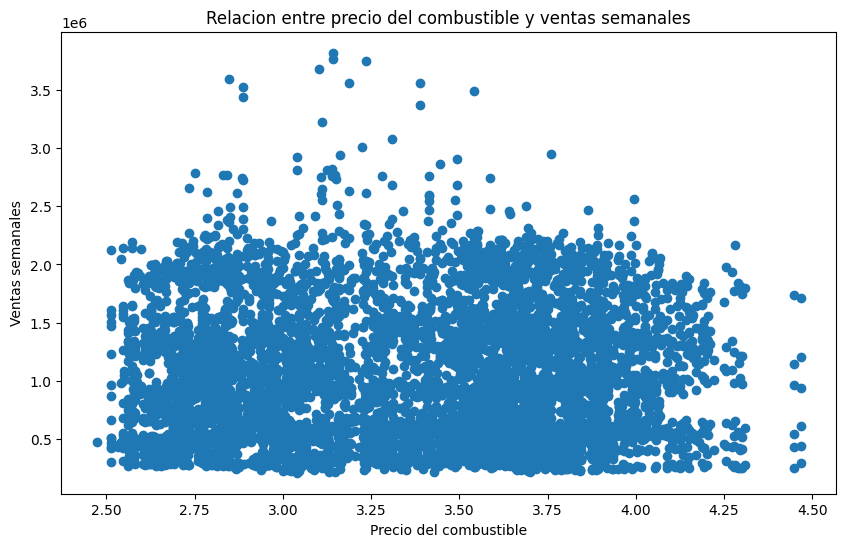

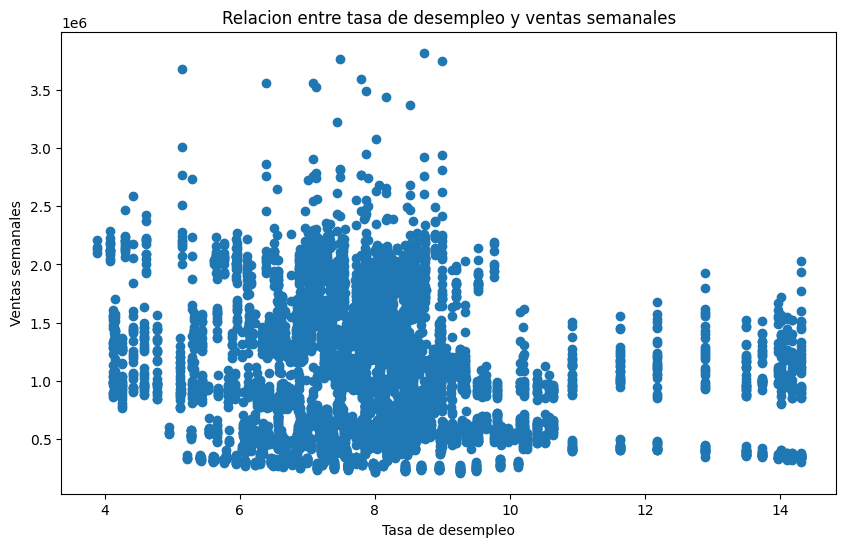

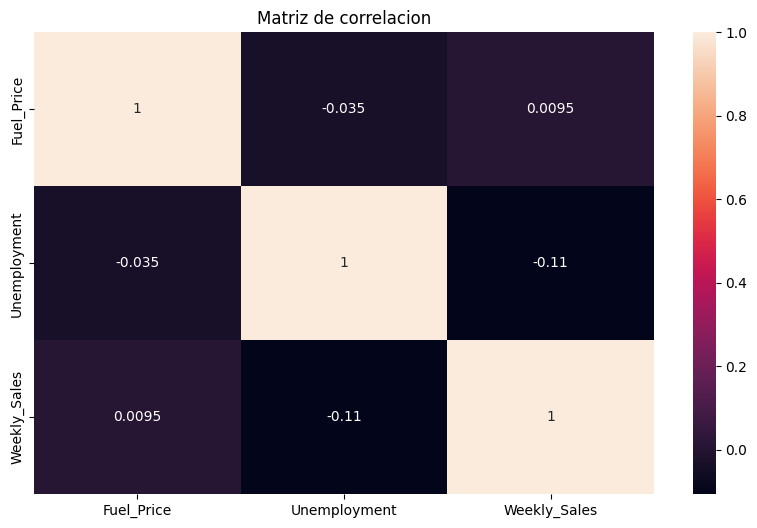

In [97]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Fuel_Price'], dataset['Weekly_Sales'])
plt.xlabel('Precio del combustible')
plt.ylabel('Ventas semanales')
plt.title('Relacion entre precio del combustible y ventas semanales')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(dataset['Unemployment'], dataset['Weekly_Sales'])
plt.xlabel('Tasa de desempleo')
plt.ylabel('Ventas semanales')
plt.title('Relacion entre tasa de desempleo y ventas semanales')
plt.show()

#En el primer gráfico de dispersión, se observa una relación débil entre el precio del combustible y las ventas semanales.
#En el segundo gráfico de dispersión, se observa una relación débil entre la tasa de desempleo y las ventas semanales.
#Para confirmar si existe alguna correlación significativa, podemos calcular la matriz de correlación y visualizarla con un mapa de calor.
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[['Fuel_Price', 'Unemployment', 'Weekly_Sales']].corr(), annot=True)
plt.title('Matriz de correlacion')
plt.show()

#La matriz de correlación muestra que no existe una correlación significativa entre ninguna de las tres variables
#Igual se puede mencionar unemployment con weekly sales pero es muy menor (negativa de -0.11)
#Las correlaciones son cercanas a cero, lo que indica que no hay una relación lineal fuerte entre estas variables.


c) Compara las ventas promedio de las semanas festivas $Holiday Flag = 1$ con las semanas no festivas $Holiday Flag = 0$. ¿Cuál es la diferencia promedio de ventas entre estos dos tipos de semanas? ¿Existe una diferencia estdísticamente significativa? (1 puntos)


Diferencia promedio de ventas entre semanas festivas y no festivas: 81631.51214670017
[ 19823.40142036 -24749.574454   -35874.43702624]
Index(['Holiday_Flag', 'Temperature', 'CPI'], dtype='object')
1044996.4142812742
LinearRegression()


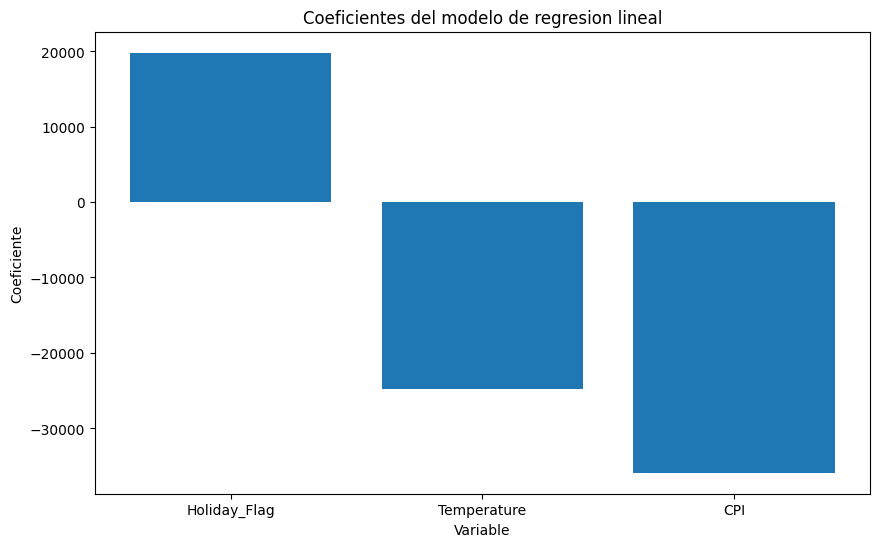

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     15.09
Date:               lu., 14 oct. 2024   Prob (F-statistic):           8.96e-10
Time:                        18:58:36   Log-Likelihood:                -75451.
No. Observations:                5148   AIC:                         1.509e+05
Df Residuals:                    5144   BIC:                         1.509e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.045e+06   7822.236    133.593      0.0

In [134]:
from sklearn.linear_model import LinearRegression


holiday_sales = dataset.groupby('Holiday_Flag')['Weekly_Sales'].mean()

#Calcula la diferencia promedio de ventas entre las semanas festivas y no festivas
difference = holiday_sales[1] - holiday_sales[0]
print(f'Diferencia promedio de ventas entre semanas festivas y no festivas: {difference}')

#Para ver si la diferencia es estadisticamente significativa vamos a hacer un modelo de regresión lineal con todas las variables 
# y estudiar sus coeficientes, concretamente el HolidayFlag
X = dataset.drop(['Weekly_Sales', 'Date','Unemployment','Store','Fuel_Price'], axis=1)
#No estamos buscando hacer un buen modelo
#solo queremos ver si la variable Holiday_Flag es estadisticamente significativa
y = dataset['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
print(model.coef_)
print(X.columns)
print(model.intercept_)
print(model)

#Para ver que variables son mas importantes en el modelo vamos a hacer un grafico de barras
plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_)
plt.xlabel('Variable')
plt.ylabel('Coeficiente')
plt.title('Coeficientes del modelo de regresion lineal')
plt.show()

#El coeficiente no nos dice si es estadisticamente signficativo, para eso necesitamos el p-valor

#Para calcular el p-valor de la variable Holiday_Flag, vamos a utilizar la libreria statsmodels
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_scaled)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

#El p-valor de la variable Holiday_Flag es muy bajo
#lo que indica que la diferencia en las ventas entre semanas festivas y no festivas 
#es estadísticamente significativa.





# Ejercicio 4: Modelado predictivo (2 puntos)

a) Encuentra el mejor modelo de regresión lineal para predecir las ventas semanales $Weekly Sales$ en función de las variables disponibles. Prueba múltiples combinaciones de variables. (1.5 puntos)


In [115]:
#Arreglamos el problema con la variable null de unemployment ahora sí que nos hace falta
dataset['Unemployment'].fillna(dataset['Unemployment'].mean(), inplace=True)

C:\Users\fpa20\AppData\Local\Temp\ipykernel_1224\4008936489.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [124]:

#Vamos a probar con todas las variables
X = dataset.drop(['Weekly_Sales', 'Date'], axis=1)
y = dataset['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f'R2 score: {model.score(X_test_scaled, y_test)}')

#El modelo de regresión lineal con todas las variables tiene un R2 score de 0.1, lo que indica que el modelo no es muy bueno para predecir las ventas semanales.
#Vamos a probar con ols para ver si hay alguna variable que no sea significativa
X_train_sm = sm.add_constant(X_train_scaled)
model_sm1 = sm.OLS(y_train, X_train_sm).fit()
print(model_sm1.summary())

#El p-valor de la variable CPI es muy alto, lo que indica que no es significativa para predecir las ventas semanales.
#Vamos a probar con un modelo sin la variable CPI
X2 = dataset.drop(['Weekly_Sales', 'Date', 'CPI'], axis=1)
y = dataset['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(f'R2 score: {model.score(X_test_scaled, y_test)}')

#Sigue siendo un modelo bastante malo, lo hacemos con ols tambien para poder sacar las metricas de 
#Error cuadratico medio y R2
X_train_sm = sm.add_constant(X_train_scaled)
model_sm2 = sm.OLS(y_train, X_train_sm).fit()
print(model_sm2.summary())







R2 score: 0.14806245178768662
                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     139.0
Date:               lu., 14 oct. 2024   Prob (F-statistic):          1.01e-163
Time:                        18:48:06   Log-Likelihood:                -75087.
No. Observations:                5148   AIC:                         1.502e+05
Df Residuals:                    5141   BIC:                         1.502e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.045e+06 

b) Compara los modelos evalúando el R² y el error cuadrático medio (MSE). ¿Cuál es el modelo con mejores métricas? (0.5 puntos)


In [135]:
"""
El primer modelo tiene un R2 score de 0.14 y el segundo modelo tiene un R2 de 0.12
lo que indica que ambos modelos no son muy buenos para predecir las ventas semanales.

"""




'\nEl primer modelo tiene un R2 score de 0.14 y el segundo modelo tiene un R2 de 0.12\nlo que indica que ambos modelos no son muy buenos para predecir las ventas semanales.\n\n'

# Ejercicio 5: Conclusiones y Recomendaciones (1 punto)

a) Redacta un informe de máximo 500 palabras resumiendo los principales hallazgos del análisis de datos y la modelización. Incluye tus conclusiones sobre qué factores influyen más en las ventas y recomendaciones para la empresa basadas en el análisis.

In [128]:
"""
    Los principales hallazgos de este análisis son los siguientes:
    - La tienda 20 es la que tiene las ventas promedio más altas, 
    mientras que la tienda 33 es la que tiene las ventas promedio más bajas.

    - Las ventas semanales de la tienda 20 presentan un patrón estacional con picos en las épocas navideñas.

    - No existe una correlación significativa entre el precio del combustible, la tasa de desempleo y las ventas semanales.
    - La correlacion mas alta es entre la tasa de desempleo y las ventas semanales, pero sigue siendo baja -0.11

    - La diferencia promedio de ventas entre las semanas festivas y no festivas es estadísticamente significativa.

    - El modelo de regresión lineal con todas las variables no es muy bueno para predecir las ventas semanales.
    - He probado a quitar la variable CPI y sigue siendo un modelo bastante malo.

    Me ha sorprendido que la tasa de desempleo no influya mas en las ventas pero entiendo que Walmart es una tienda
    de primera necesidad que vende productos a precios bajos, por lo que la tasa de desempleo no afecta tanto a sus ventas.

    Mis recomendaciones para Walmart serían, por ejemplo, centrarse en las épocas navideñas para aumentar las ventas,
    debido a que estas epocas pese a ser breven representan un gran porcentaje de las ventas anuales.
    Tambien realizar campañas de promocion durante las fechas festivas para maximizar las ventas.
    """

'\n    Los principales hallazgos de este análisis son los siguientes:\n    - La tienda 20 es la que tiene las ventas promedio más altas, \n    mientras que la tienda 33 es la que tiene las ventas promedio más bajas.\n\n    - Las ventas semanales de la tienda 20 presentan un patrón estacional con picos en las épocas navideñas.\n\n    - No existe una correlación significativa entre el precio del combustible, la tasa de desempleo y las ventas semanales.\n    - La correlacion mas alta es entre la tasa de desempleo y las ventas semanales, pero sigue siendo baja -0.11\n\n    - La diferencia promedio de ventas entre las semanas festivas y no festivas es estadísticamente significativa.\n\n    - El modelo de regresión lineal con todas las variables no es muy bueno para predecir las ventas semanales.\n    - He probado a quitar la variable CPI y sigue siendo un modelo bastante malo.\n\n    Me ha sorprendido que la tasa de desempleo no influya mas en las ventas pero entiendo que Walmart es una tie